In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('iris.data')
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [2]:
#指定列名
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
# split data table into data X and class labels y

X = df.ix[:,0:4].values
y = df.ix[:,4].values

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


# 各个特征的可视化展示

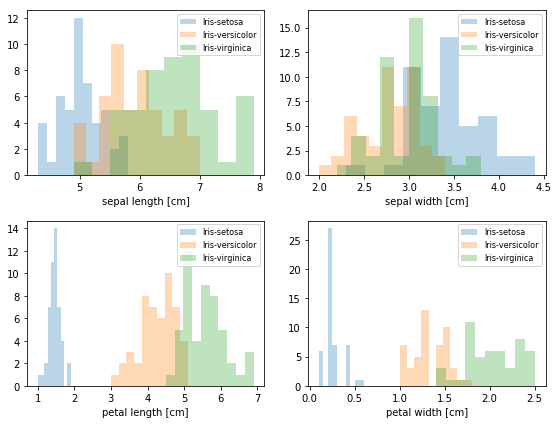

In [4]:
from matplotlib import pyplot as plt
import math

label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}


plt.figure(figsize=(8, 6))
for cnt in range(4):
    plt.subplot(2, 2, cnt+1)
    for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
        plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
    plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

plt.tight_layout()
plt.show()

# 标准化处理

In [5]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
print (X_std[0:4,:],'\n',np.mean(X_std,0),'\n',np.std(X_std,0))

[[-1.1483555  -0.11805969 -1.35396443 -1.32506301]
 [-1.3905423   0.34485856 -1.41098555 -1.32506301]
 [-1.51163569  0.11339944 -1.29694332 -1.32506301]
 [-1.02726211  1.27069504 -1.35396443 -1.32506301]] 
 [ 2.38437160e-16  2.38437160e-17 -9.53748639e-17 -1.43062296e-16] 
 [1. 1. 1. 1.]


# 具体的计算过程
## 计算协方差

In [6]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00675676 -0.10448539  0.87716999  0.82249094]
 [-0.10448539  1.00675676 -0.41802325 -0.35310295]
 [ 0.87716999 -0.41802325  1.00675676  0.96881642]
 [ 0.82249094 -0.35310295  0.96881642  1.00675676]]


In [7]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00675676 -0.10448539  0.87716999  0.82249094]
 [-0.10448539  1.00675676 -0.41802325 -0.35310295]
 [ 0.87716999 -0.41802325  1.00675676  0.96881642]
 [ 0.82249094 -0.35310295  0.96881642  1.00675676]]


# 计算协方差的特征值、特征向量

In [8]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52308496 -0.36956962 -0.72154279  0.26301409]
 [-0.25956935 -0.92681168  0.2411952  -0.12437342]
 [ 0.58184289 -0.01912775  0.13962963 -0.80099722]
 [ 0.56609604 -0.06381646  0.63380158  0.52321917]]

Eigenvalues 
[2.92442837 0.93215233 0.14946373 0.02098259]


In [9]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print (eig_pairs)
print ('----------')
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

[(2.9244283691111126, array([ 0.52308496, -0.25956935,  0.58184289,  0.56609604])), (0.9321523302535072, array([-0.36956962, -0.92681168, -0.01912775, -0.06381646])), (0.14946373489813383, array([-0.72154279,  0.2411952 ,  0.13962963,  0.63380158])), (0.020982592764270565, array([ 0.26301409, -0.12437342, -0.80099722,  0.52321917]))]
----------
Eigenvalues in descending order:
2.9244283691111126
0.9321523302535072
0.14946373489813383
0.020982592764270565


# 维度选择

In [10]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print (var_exp)
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

[72.62003332692029, 23.147406858644153, 3.711515564584534, 0.5210442498510144]


array([ 72.62003333,  95.76744019,  99.47895575, 100.        ])

In [11]:
a = np.array([1,2,3,4])
print (a)
print ('-----------')
print (np.cumsum(a))

[1 2 3 4]
-----------
[ 1  3  6 10]


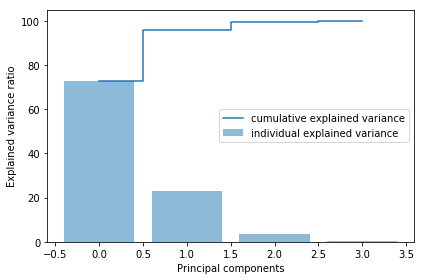

In [12]:

plt.figure(figsize=(6, 4))

plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [13]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52308496 -0.36956962]
 [-0.25956935 -0.92681168]
 [ 0.58184289 -0.01912775]
 [ 0.56609604 -0.06381646]]


In [14]:
Y = X_std.dot(matrix_w)
Y[0:5,:]

array([[-2.10795032,  0.64427554],
       [-2.38797131,  0.30583307],
       [-2.32487909,  0.56292316],
       [-2.40508635, -0.687591  ],
       [-2.08320351, -1.53025171]])

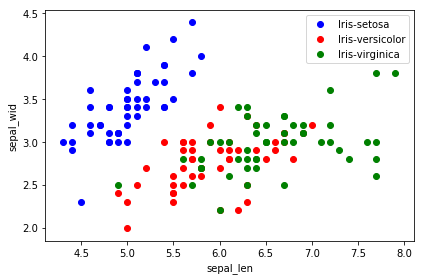

In [15]:
plt.figure(figsize=(6, 4))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
     plt.scatter(X[y==lab, 0],
                X[y==lab, 1],
                label=lab,
                c=col)
plt.xlabel('sepal_len')
plt.ylabel('sepal_wid')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

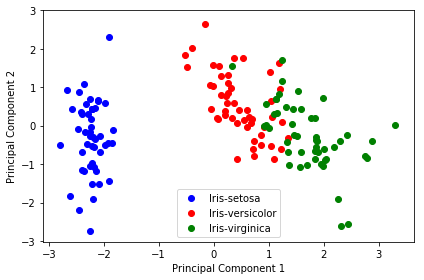

In [16]:
plt.figure(figsize=(6, 4))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
     plt.scatter(Y[y==lab, 0],
                Y[y==lab, 1],
                label=lab,
                c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

# Sklearn的实现

In [17]:
##导入PCA库
from sklearn.decomposition import PCA

In [18]:
##加载PCA模型并训练、降维
model_pca = PCA(n_components=3)
iris_X = X
X_pca = model_pca.fit(iris_X).transform(iris_X)
print(iris_X.shape)
print(iris_X[0:5])
print(X_pca.shape)
print(X_pca[0:5])

(149, 4)
[[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]]
(149, 3)
[[-2.73363445 -0.16331092 -0.20387761]
 [-2.90803676 -0.13076902  0.02432666]
 [-2.76491784 -0.30475856  0.03735406]
 [-2.7461081   0.34027983  0.09572342]
 [-2.29679724  0.75348469  0.17374038]]


In [26]:
model_pca = PCA(n_components=4)
# fit(X): 用数据X来训练PCA模型。
# transform(X)：将数据X转换成降维后的数据，当模型训练好后，对于新输入的数据，也可以用transform方法来降维。
X_pca = model_pca.fit(iris_X).transform(iris_X)

print("各主成分方向：\n",model_pca.components_)
print("各主成分的方差值：",model_pca.explained_variance_)
print("各主成分的方差值与总方差之比：",model_pca.explained_variance_ratio_)
print('前几个主成分的方差值之和与总方差之比',np.cumsum(model_pca.explained_variance_ratio_))
print("主成分数：",model_pca.n_components_)
print("奇异值分解后得到的特征值：", model_pca.singular_values_ )
print('特征值所占比例：', np.cumsum(model_pca.singular_values_) /np.sum(model_pca.singular_values_))

各主成分方向：
 [[ 0.36263433 -0.08122848  0.85629752  0.35868209]
 [ 0.6558202   0.73001455 -0.17703033 -0.07509244]
 [-0.58115529  0.59619427  0.07265649  0.54911925]
 [ 0.3172613  -0.32408808 -0.47972477  0.75111672]]
各主成分的方差值： [4.20438706 0.24314579 0.07905128 0.02384304]
各主成分的方差值与总方差之比： [0.92395437 0.05343362 0.01737228 0.00523974]
前几个主成分的方差值之和与总方差之比 [0.92395437 0.97738799 0.99476026 1.        ]
主成分数： 4
奇异值分解后得到的特征值： [24.94492504  5.998798    3.42046617  1.87850206]
特征值所占比例： [0.68827463 0.85379209 0.9481688  1.        ]


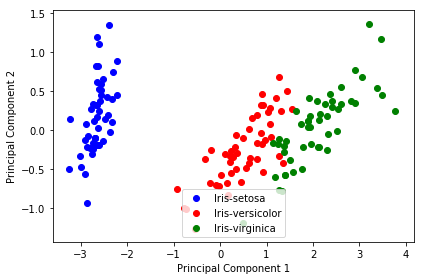

In [30]:
plt.figure(figsize=(6, 4))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), ('blue', 'red', 'green')):
     plt.scatter(X_pca[y==lab, 0], X_pca[y==lab, 1], label=lab, c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()
#明显官方的实现更好一点

In [20]:
import sklearn
sklearn.__version__

'0.21.2'